In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
  

In [6]:
df = pd.read_csv('Champagne3.csv',index_col ='Month',parse_dates = True)

In [7]:
df.columns

Index(['Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')

In [8]:
df.isnull().sum()

Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

In [9]:
df['Perrin Freres monthly champagne sales millions ?64-?72'].fillna(df['Perrin Freres monthly champagne sales millions ?64-?72'].mean(), inplace=True)

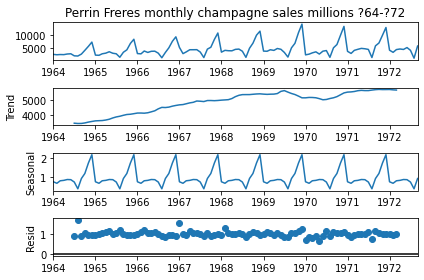

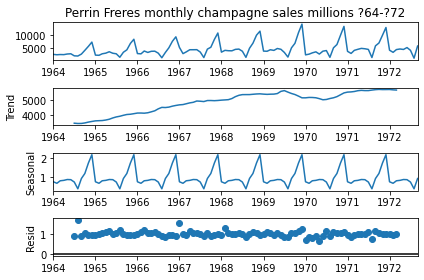

In [14]:
# ETS Decomposition
result = seasonal_decompose(df['Perrin Freres monthly champagne sales millions ?64-?72'], model ='multiplicative')
  
# ETS plot 
result.plot()

In [11]:
from pmdarima import auto_arima

In [47]:
import warnings
warnings.filterwarnings("ignore")
  

In [49]:
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['Perrin Freres monthly champagne sales millions ?64-?72'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1501.191, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1500.884, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1498.757, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1498.942, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1511.271, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1499.959, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1499.625, Time=0.66 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1500.741, Time=0.45 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1499.028, Time=0.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1501.490, Time=0.87 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1500.866, Time=0.32 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1500.295, Time=0.69 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1500.747, Time=0.62 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1498.167, Time=0.82 sec
 ARIMA(0,0,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  105
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -745.083
Date:                             Mon, 26 Sep 2022   AIC                           1498.167
Time:                                     17:27:53   BIC                           1508.297
Sample:                                 01-01-1964   HQIC                          1502.257
                                      - 09-01-1972                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    362.8388    100.620      3.606      0.000     165.627     560.050
ma.L1          0.2191      0.074      2.970      0.003       0.075       0.364
ar.S.L12      -0.1784      0.082     -2.186      0.029      -0.338      -0.018
sigma2      5.135e+05   5.75e+04      8.924      0.000    4.01e+05    6.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 8.20
Prob(Q):                              0.55   Prob(JB):                         0.02
Heteroskedasticity (H):               1.27   Skew:                            -0.15
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
# Split data into train / test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Perrin Freres monthly champagne sales millions ?64-?72'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01864D+00    |proj g|=  1.46604D-01

At iterate    5    f=  6.99183D+00    |proj g|=  6.66963D-03

At iterate   10    f=  6.97491D+00    |proj g|=  4.68049D-02

At iterate   15    f=  6.96277D+00    |proj g|=  1.14945D-02

At iterate   20    f=  6.96197D+00    |proj g|=  3.00083D-04

At iterate   25    f=  6.96185D+00    |proj g|=  3.54937D-03

At iterate   30    f=  6.95379D+00    |proj g|=  1.76193D-02

At iterate   35    f=  6.93560D+00    |proj g|=  2.24779D-02

At iterate   40    f=  6.92863D+00    |proj g|=  1.49894D-03

At iterate   45    f=  6.92858D+00    |proj g|=  3.69046D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  6.92855D+00    |proj g|=  4.65573D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     88      2     0     0   4.656D-04   6.929D+00
  F =   6.9285464994405146     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 SARIMAX Results                                                  
==================================================================================================================
Dep. Variable:     Perrin Freres monthly champagne sales millions ?64-?72   No. Observations:                   93
Model:                                     SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -644.355
Date:                                                    Mon, 26 Sep 2022   AIC                           1298.710
Time:                                                            17:29:38   BIC                           1310.620
Sample:                                                        01-01-1964   HQIC                          1303.485
                                                             - 09-01-1971                                         
Covariance Type:                                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7605      0.071    -10.773      0.000      -0.899      -0.622
ar.S.L12       0.5328      0.093      5.703      0.000       0.350       0.716
ar.S.L24       0.4663      0.088      5.319      0.000       0.294       0.638
ma.S.L12      -0.9778      0.161     -6.071      0.000      -1.294      -0.662
sigma2      4.431e+05   4.02e-07    1.1e+12      0.000    4.43e+05    4.43e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.25   Prob(JB):                         0.49
Heteroskedasticity (H):               1.70   Skew:                             0.10
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.78e+26. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Month'>

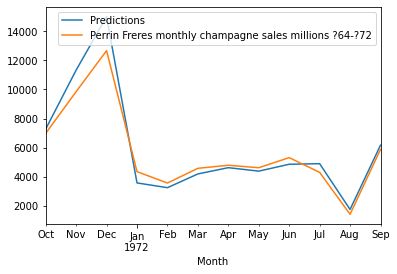

In [51]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Perrin Freres monthly champagne sales millions ?64-?72'].plot(legend = True)

In [52]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [53]:
# Calculate root mean squared error
rmse(test["Perrin Freres monthly champagne sales millions ?64-?72"], predictions)

887.4885799713979

In [54]:
# Calculate mean squared error
mean_squared_error(test["Perrin Freres monthly champagne sales millions ?64-?72"], predictions)

787635.9795796485

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08915D+00    |proj g|=  6.41763D-02

At iterate    5    f=  7.07628D+00    |proj g|=  1.82323D-02


 This problem is unconstrained.



At iterate   10    f=  7.07505D+00    |proj g|=  8.63784D-04

At iterate   15    f=  7.06974D+00    |proj g|=  2.50976D-02

At iterate   20    f=  7.06761D+00    |proj g|=  3.03817D-03

At iterate   25    f=  7.06752D+00    |proj g|=  4.82799D-04

At iterate   30    f=  7.06680D+00    |proj g|=  8.81692D-03

At iterate   35    f=  7.05844D+00    |proj g|=  1.61794D-02

At iterate   40    f=  7.05548D+00    |proj g|=  8.74747D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  7.05543D+00    |proj g|=  2.32069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     80      2     0     0   2.321D-05   7.055D+00
  F =   7.0554320542687599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<AxesSubplot:xlabel='Month'>

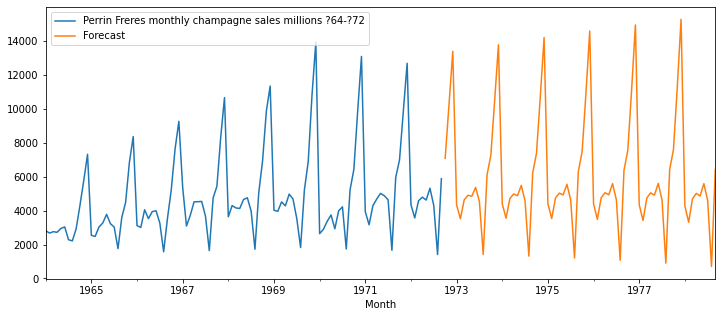

In [55]:
# Train the model on the full dataset
model = model = SARIMAX(df['Perrin Freres monthly champagne sales millions ?64-?72'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 6 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['Perrin Freres monthly champagne sales millions ?64-?72'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)